In [1]:
import os
os.chdir("../")
import config.input
import numpy as np
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# train_loader_fn, test_loader_fn = config.input.options["left_out_varied_location_mnist"]
train_loader_fn, test_loader_fn = config.input.options["left_out_colored_mnist"] 

args = {
    "batch_size": 1,
    "test_batch_size": 1,
    "use_cuda": False,
    "keep_pct": 0.1, 
    "color_indices": np.arange(10)
}

In [3]:
train_loader = train_loader_fn(args)
test_loader = test_loader_fn(args)

train_values = np.zeros(train_loader.dataset.combination_space_shape)
test_values = np.zeros(test_loader.dataset.combination_space_shape)

for _, (_, target) in enumerate(train_loader):
    train_values[target.data[0][0], target.data[0][1]] += 1
    
for _, (_, target) in enumerate(test_loader):
    test_values[target.data[0][0], target.data[0][1]] += 1

/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [4]:
def display_data_hist(values):
    %matplotlib notebook

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.bar3d([x for x in range(values.shape[0]) for y in range(values.shape[1])], [y for x in range(values.shape[0]) for y in range(values.shape[1])], np.zeros(()), np.ones(()), np.ones(()), values.flatten(), zsort='average')

    plt.show()

<IPython.core.display.Javascript object>


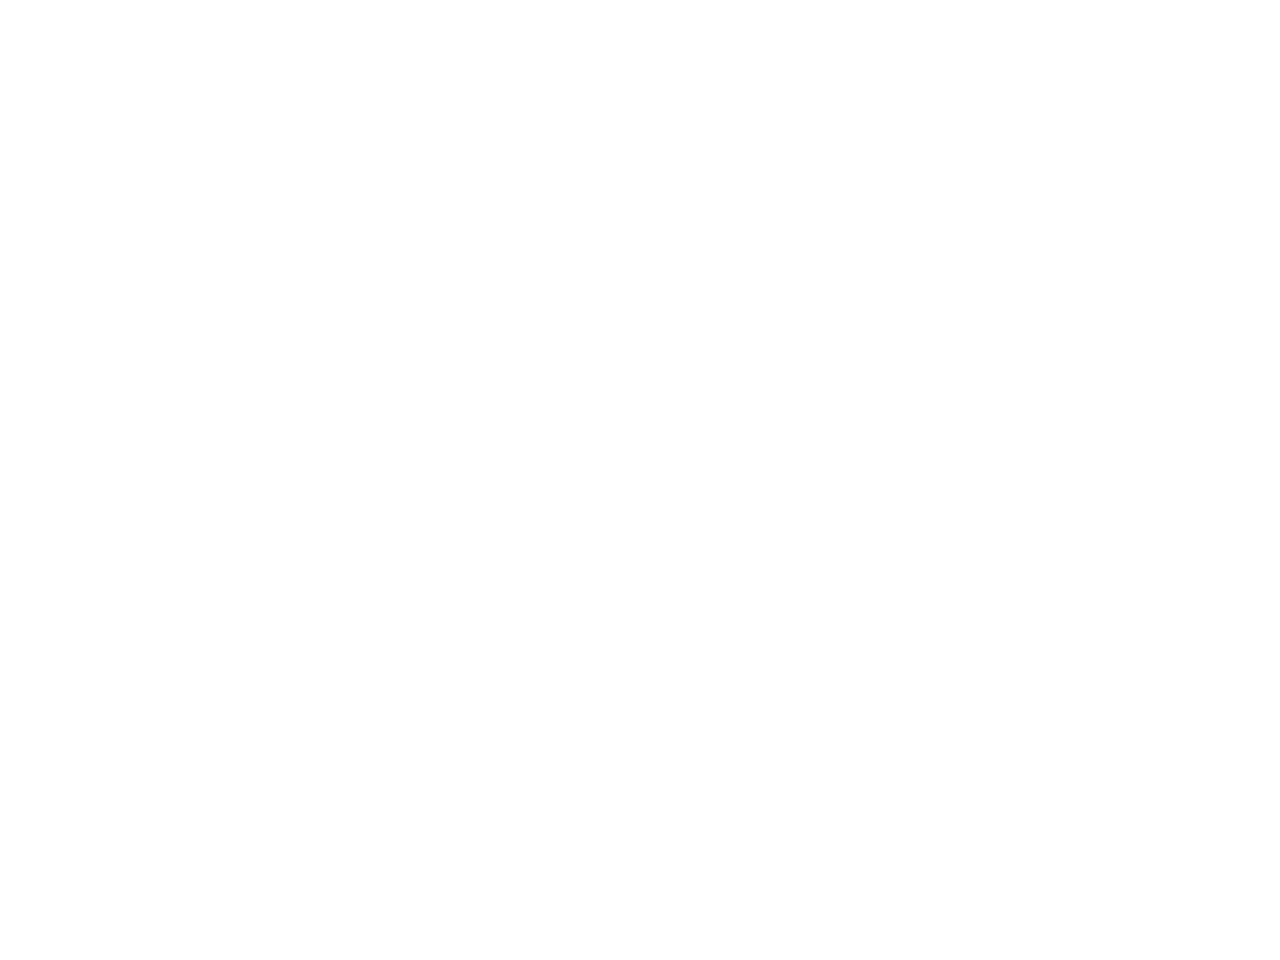

In [5]:
display_data_hist(train_values)

<IPython.core.display.Javascript object>


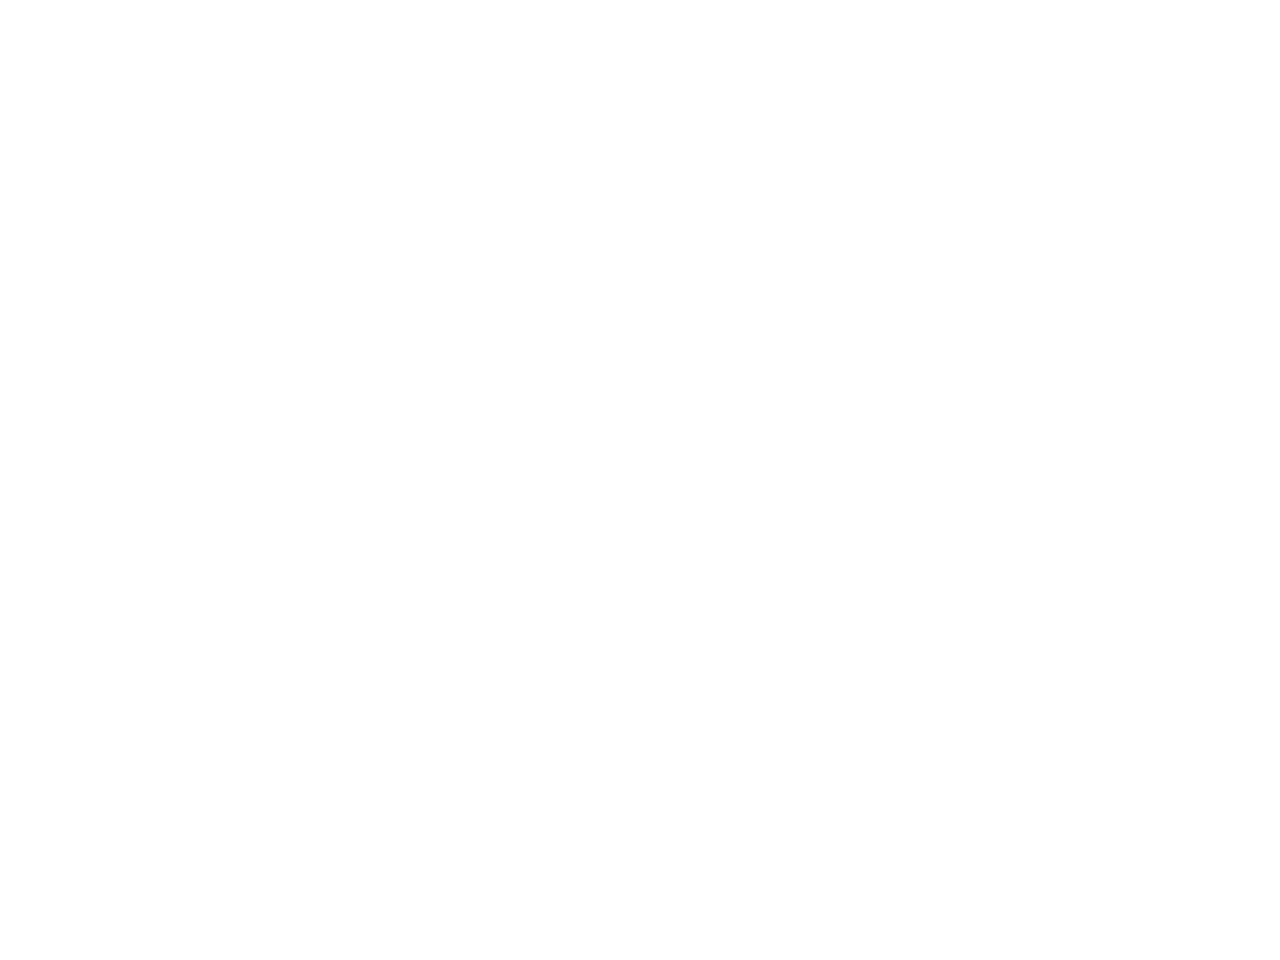

In [6]:
display_data_hist(test_values)

<IPython.core.display.Javascript object>


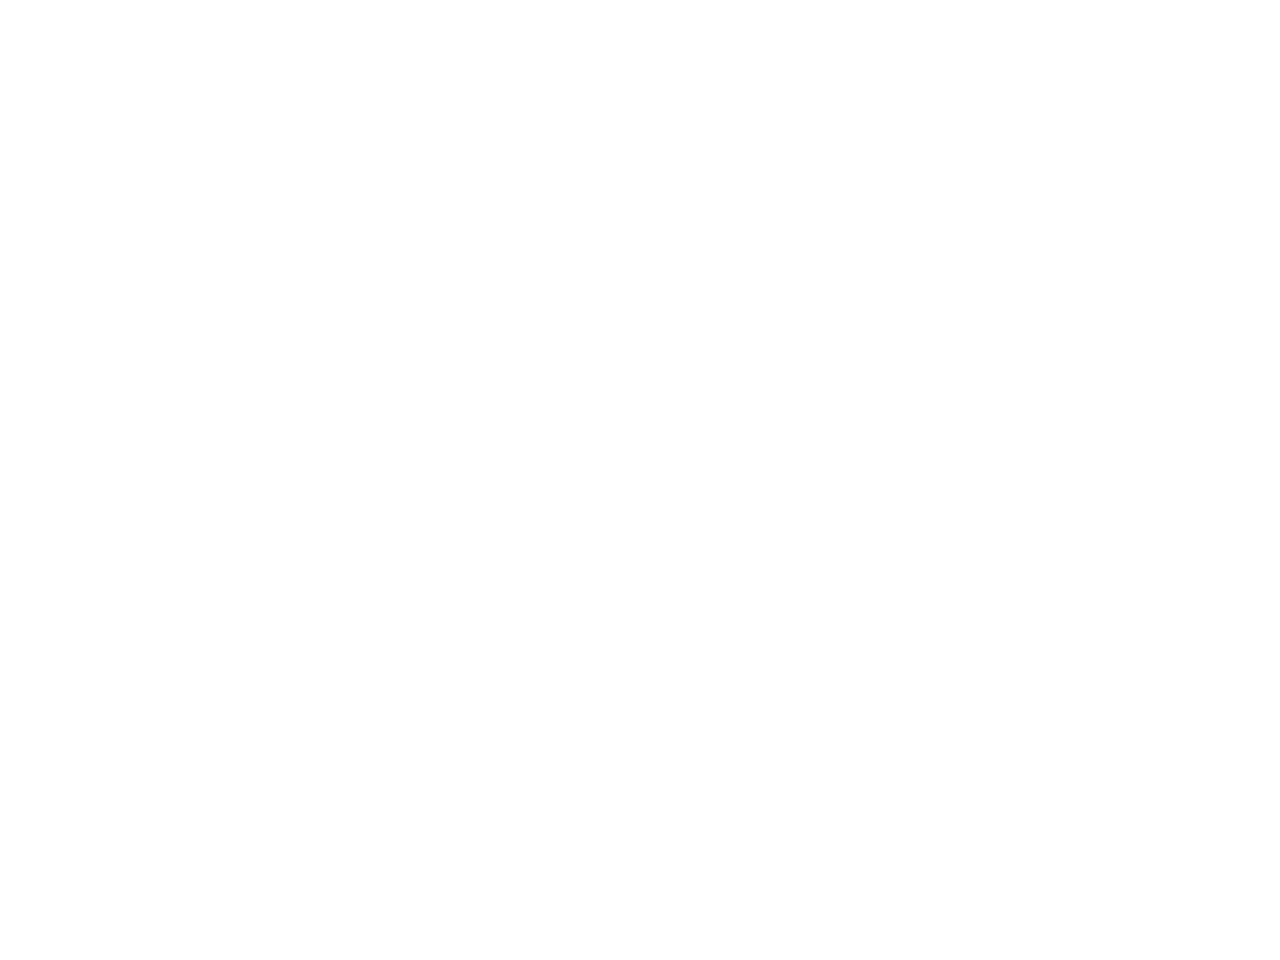

In [7]:
control_test_values = np.zeros(test_values.shape)
for i, j in test_loader.dataset.control:
    control_test_values[i, j] = test_values[i, j]
display_data_hist(control_test_values)

<IPython.core.display.Javascript object>


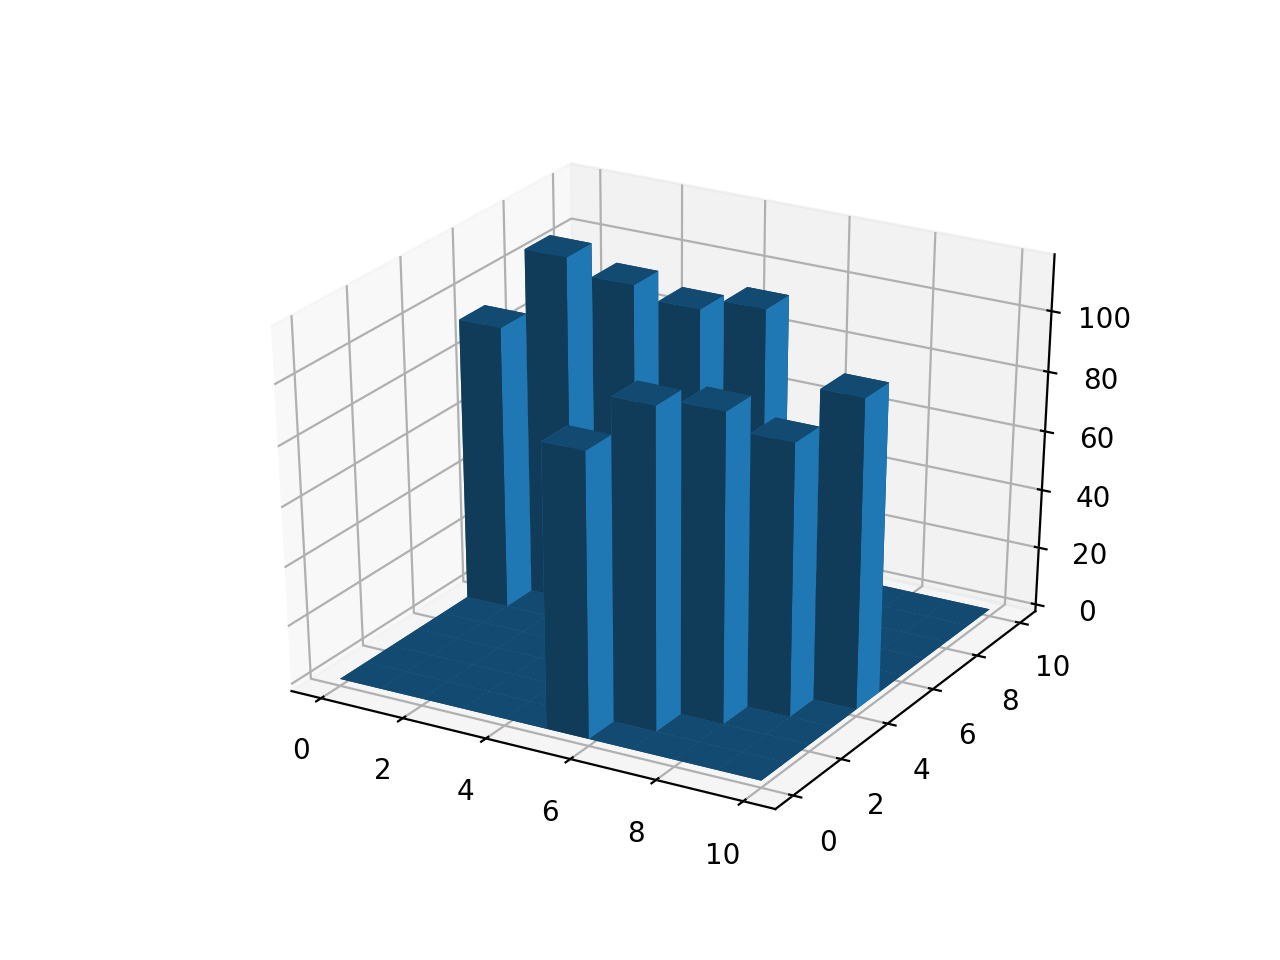

In [8]:
held_out_test_values = np.zeros(test_values.shape)
for i, j in test_loader.dataset.held_out:
    held_out_test_values[i, j] = test_values[i, j]
display_data_hist(held_out_test_values)

In [9]:
def display_stimuli(loader):
    border_mask = np.ones((32, 32, 3)) * 255
    border_mask[1:-1, 1:-1, :] = 0
    
    output = np.zeros((32 * loader.dataset.combination_space_shape[0], \
                       32 * loader.dataset.combination_space_shape[1], \
                       3))
    for _, (data, target) in enumerate(loader):
        label_1, label_2 = int(target.data[0][0]), int(target.data[0][1])
        offset_1, offset_2 = label_1 * 32, label_2 * 32
        output[offset_1:(offset_1 + 32), offset_2:(offset_2 + 32),:] = np.moveaxis(data[0].numpy(), 0, -1) * 256 + border_mask
    return output.astype("uint8")

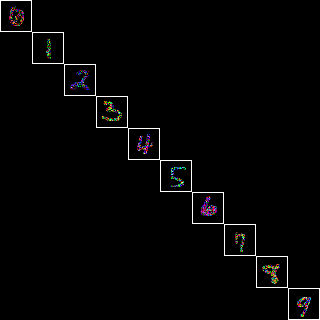

In [10]:
train_output = display_stimuli(train_loader)
    
train_img = Image.fromarray(train_output)
train_img

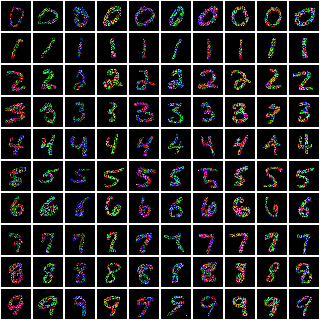

In [11]:
test_output = display_stimuli(test_loader)
    
test_img = Image.fromarray(test_output)
test_img

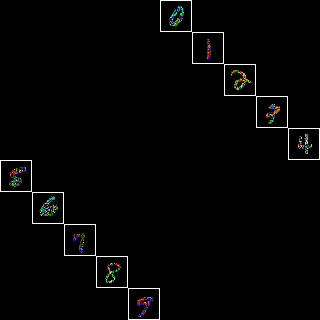

In [12]:
held_out_test_output = np.zeros(test_output.shape, dtype="uint8")
for i, j in test_loader.dataset.held_out:
    idx_1, idx_2 = i * 32, j * 32
    held_out_test_output[idx_1:(idx_1 + 32), idx_2:(idx_2 + 32), :] = test_output[idx_1:(idx_1 + 32), idx_2:(idx_2 + 32), :]

held_out_test_img = Image.fromarray(held_out_test_output)
held_out_test_img

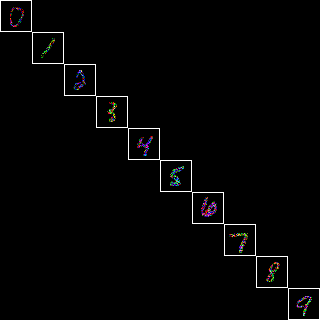

In [13]:
control_test_output = np.zeros(test_output.shape, dtype="uint8")
for i, j in test_loader.dataset.control:
    idx_1, idx_2 = i * 32, j * 32
    control_test_output[idx_1:(idx_1 + 32), idx_2:(idx_2 + 32), :] = test_output[idx_1:(idx_1 + 32), idx_2:(idx_2 + 32), :]

control_test_img = Image.fromarray(control_test_output)
control_test_img